In [1]:
"""
    Las siguientes 2 lineas corrigen un problema de 
        utilizar anaconda, en especial la libreria GraphViz en Windows
"""
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Eliseo_AGC\\Anaconda3\\Library\\bin\\graphviz'
import warnings
warnings.filterwarnings('ignore')

from utils import draw_tree

import numpy as np
import pandas as pd
import seaborn  as sb

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

## Procesamiento de los datos

In [2]:
df = pd.read_csv('data.csv')
print("Tamaño del conjunto de datos {}".format(df.shape))

df.head()

Tamaño del conjunto de datos (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Información de los atributos

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3) ... 32) Se calculan diez características de valor real para cada núcleo celular:

VALOR | INFORMACIÓN                                                                                           |
------|-------------------------------------------------------------------------------------------------------|
a)    |radio (media de las distancias desde el centro a los puntos del perímetro)                             | 
b)    |textura (desviación estándar de los valores de la escala de grises)                                    |
c)    |perímetro d) área e) suavidad (variación local en las longitudes de radio)                             |
f)    |compacidad (perímetro ^ 2 / área - 1.0) g) concavidad (gravedad de las porciones cóncavas del contorno)|
h)    |puntos cóncavos (número de porciones cóncavas del contorno)                                            | 
i)    |simetría                                                                                               |
j)    |dimensión fractal ("aproximación de la costa" - 1)                                                     |

La media, el error estándar y el "peor" o mayor (media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es Radio medio, el campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de características se recodifican con cuatro dígitos significativos.

REFERENCIAS
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
* https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [3]:
# Seleccionar las caracteristicas a utilizar
# Se utilizaran los 32 atributos del conjunto de datos

numAtributos = 32  # cantidad de atributos a utilizar
X = df.iloc[:, 2:32].values

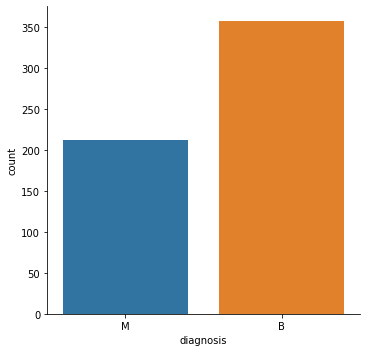

In [4]:
"""
    ETIQUETAS
    
    M = maligno
    B = benigno
"""

sb.factorplot('diagnosis',data=df,kind="count")

y = df['diagnosis']

In [5]:
# Separacion de datos de entrenamiento y prueba en 70% y 30% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print("Dimensión {} del conjunto de entrenamiento".format(X_train.shape))
print("Dimensión {} del conjunto de prueba".format(X_test.shape))

Dimensión (398, 30) del conjunto de entrenamiento
Dimensión (171, 30) del conjunto de prueba


## Árbol de Decisión

* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

### ¿Cómo decide un árbol dónde ramificarse?
* Entropia.
* Impureza de Gini.
* Missclasification

### Aplicación de entropia

Ganancia de información:

Se utiliza para atributos categóricos (cómo en hombre/mujer). Este criterio intenta estimar la información que aporta cada atributo basado en la «teoría de la información«. Para medir la aleatoriedad de incertidumbre de un valor aleatorio de una variable «X» se define la Entropia.
Entropía se refiere al desorden o incertidumbre respecto de
como se organizan estos símbolos. Deberemos maximizar esa ganancia

In [6]:
heuristic = "entropy"
decision_tree = tree.DecisionTreeClassifier(criterion = heuristic, random_state = 100, 
            max_depth = 5, min_samples_leaf = 5)

# Entrenamiento del modelo
decision_tree.fit(X_train, y_train)

# Predeccion del modelo
predTree = decision_tree.predict(X_test)

In [7]:
print("Evaluación")
print("La precisión del modelo usando Entropia: ", metrics.accuracy_score(y_test, predTree))
print("Profundidad del árbol: ", decision_tree.tree_.max_depth)

Evaluación
La precisión del modelo usando Entropia:  0.9415204678362573
Profundidad del árbol:  5


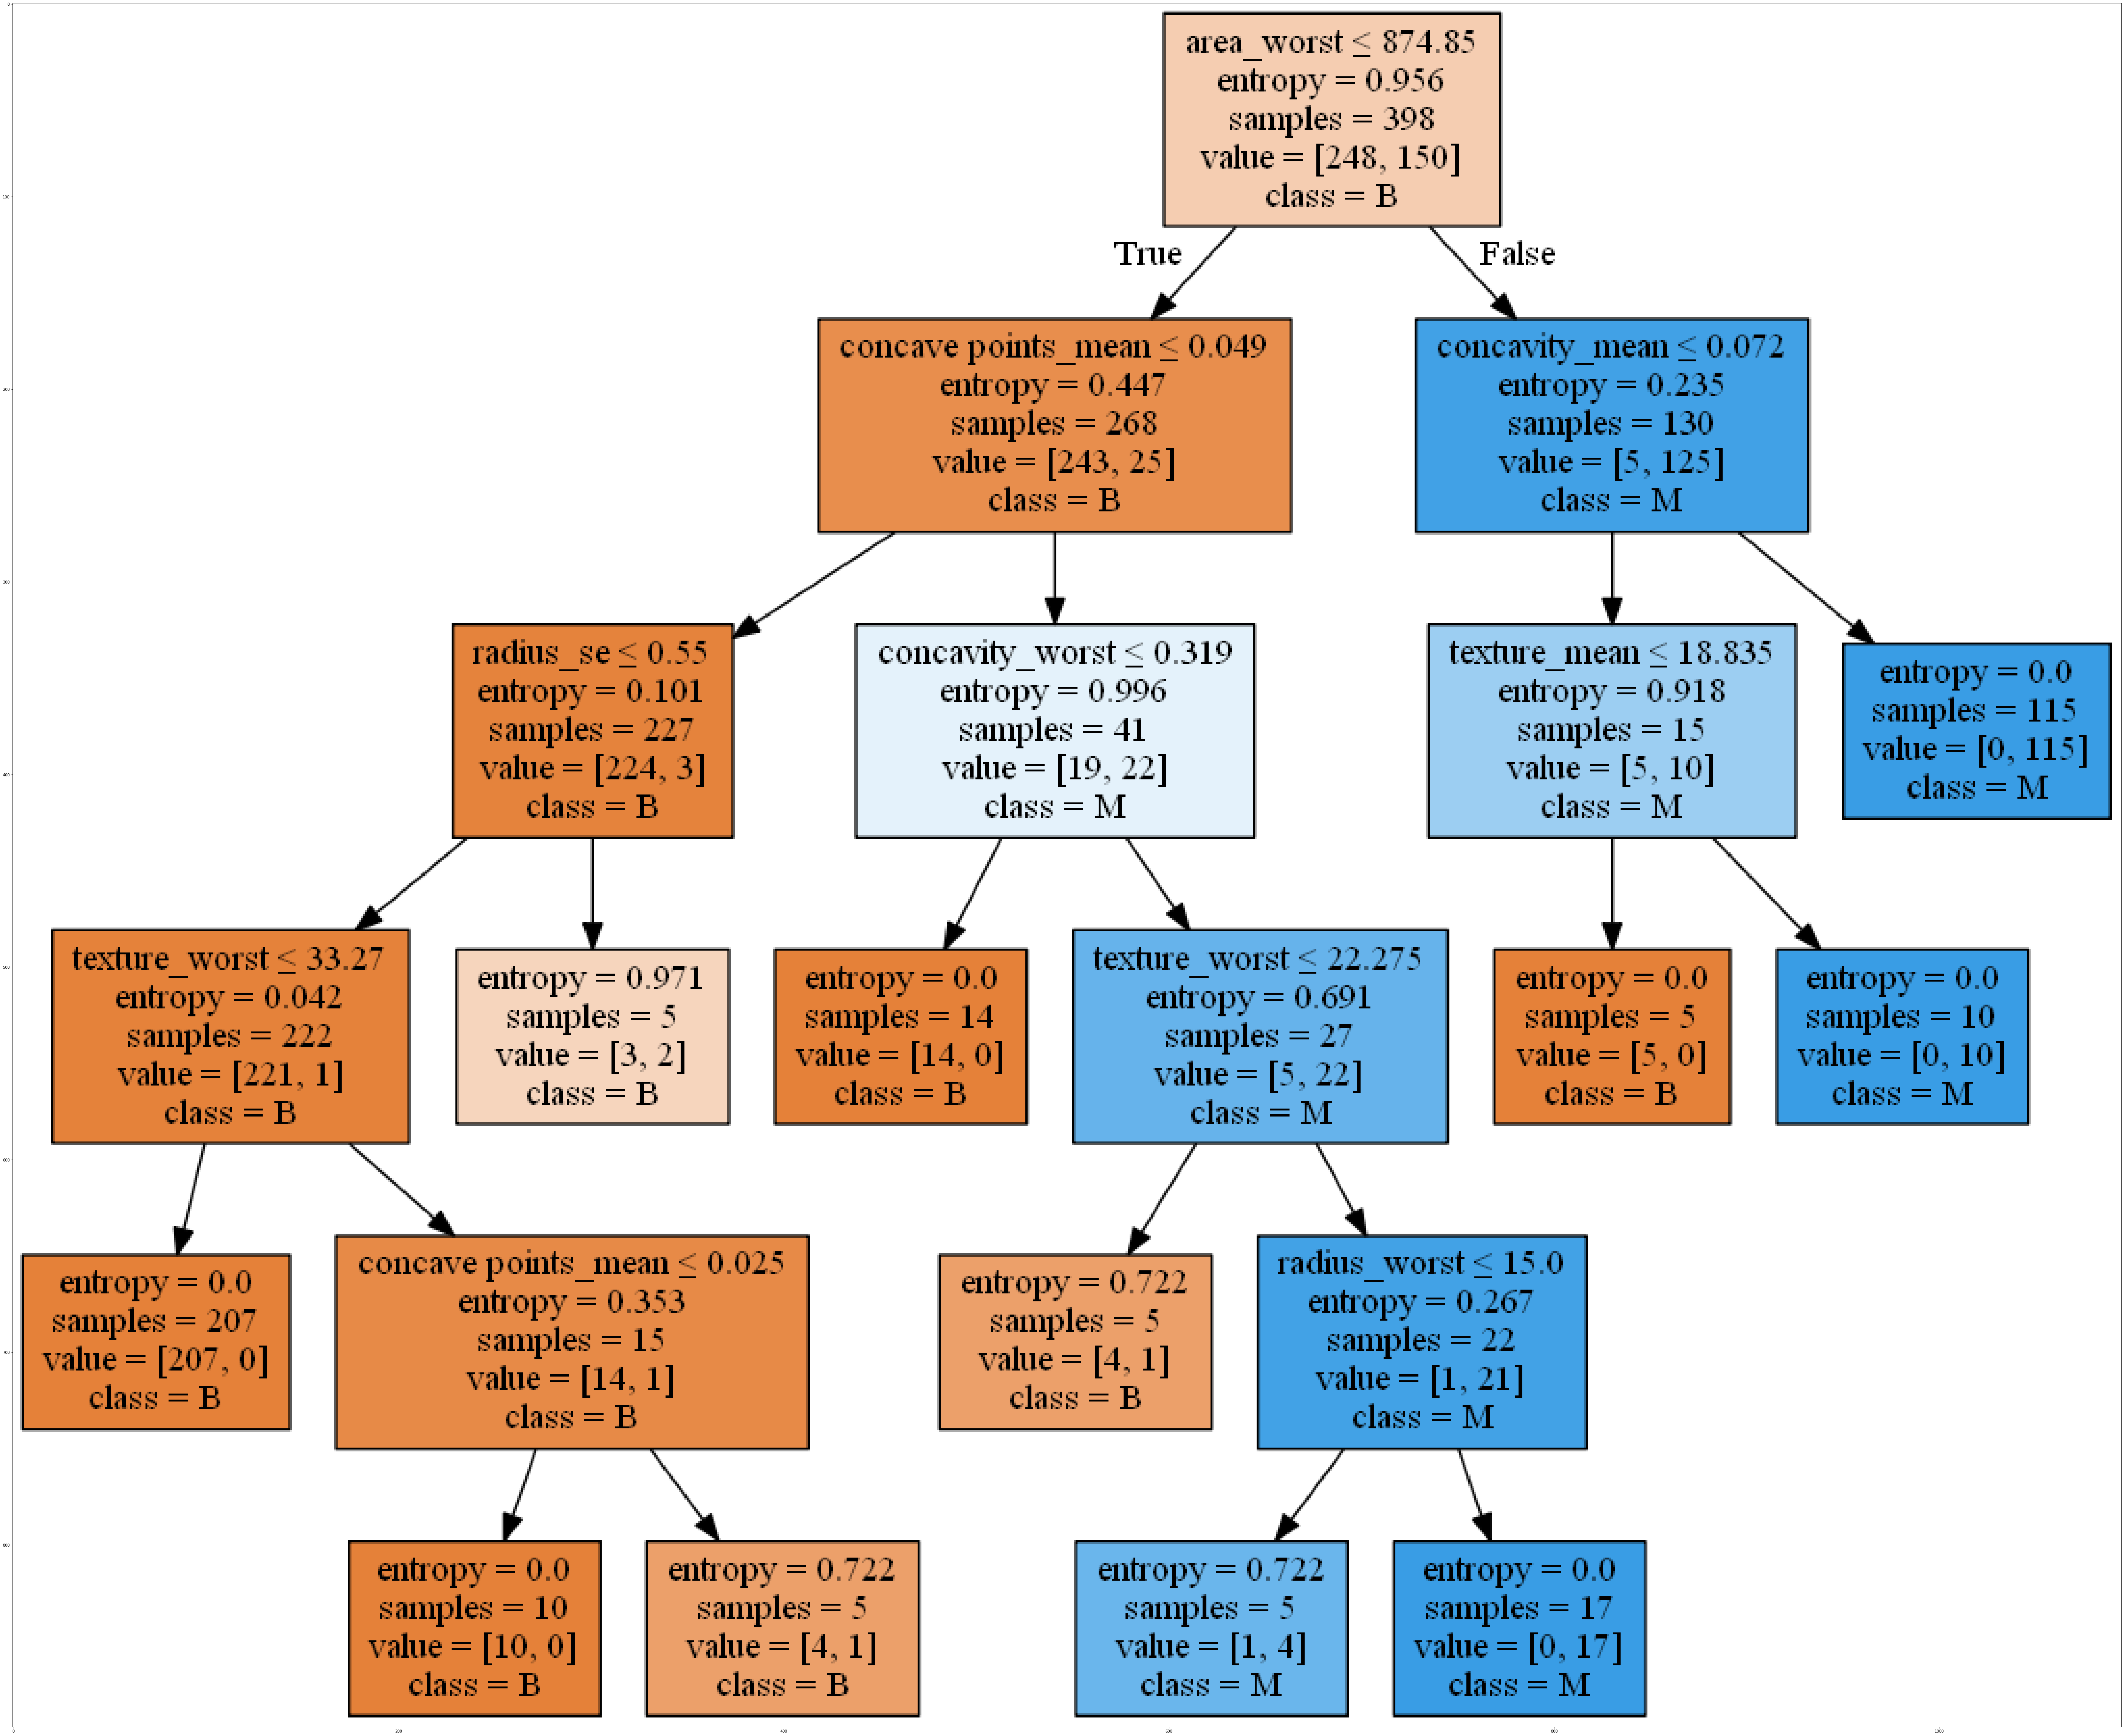

In [8]:
draw_tree(df, decision_tree, "decision-tree-entropy.png", numAtributos, y_train)

### Aplicación de indice Gini

Se utiliza para atributos con valores continuos (precio de una casa). Esta función de coste mide el «grado de impureza» de los nodos, es decir, cuán desordenados o mezclados quedan los nodos una vez divididos. Deberemos minimizar ese GINI index.

In [9]:
heuristic_g = "gini"
decision_tree_g = tree.DecisionTreeClassifier(criterion = heuristic_g)

# Entrenamiento del modelo
decision_tree_g.fit(X_train,y_train)

# prediccion del modelo
predTree_g = decision_tree_g.predict(X_test)

In [10]:
print("Evaluación")
print("La precisión del modleo usando Gini: ", metrics.accuracy_score(y_test, predTree_g))
print("Profundidad del árbol: ", decision_tree_g.tree_.max_depth)

Evaluación
La precisión del modleo usando Gini:  0.9590643274853801
Profundidad del árbol:  6


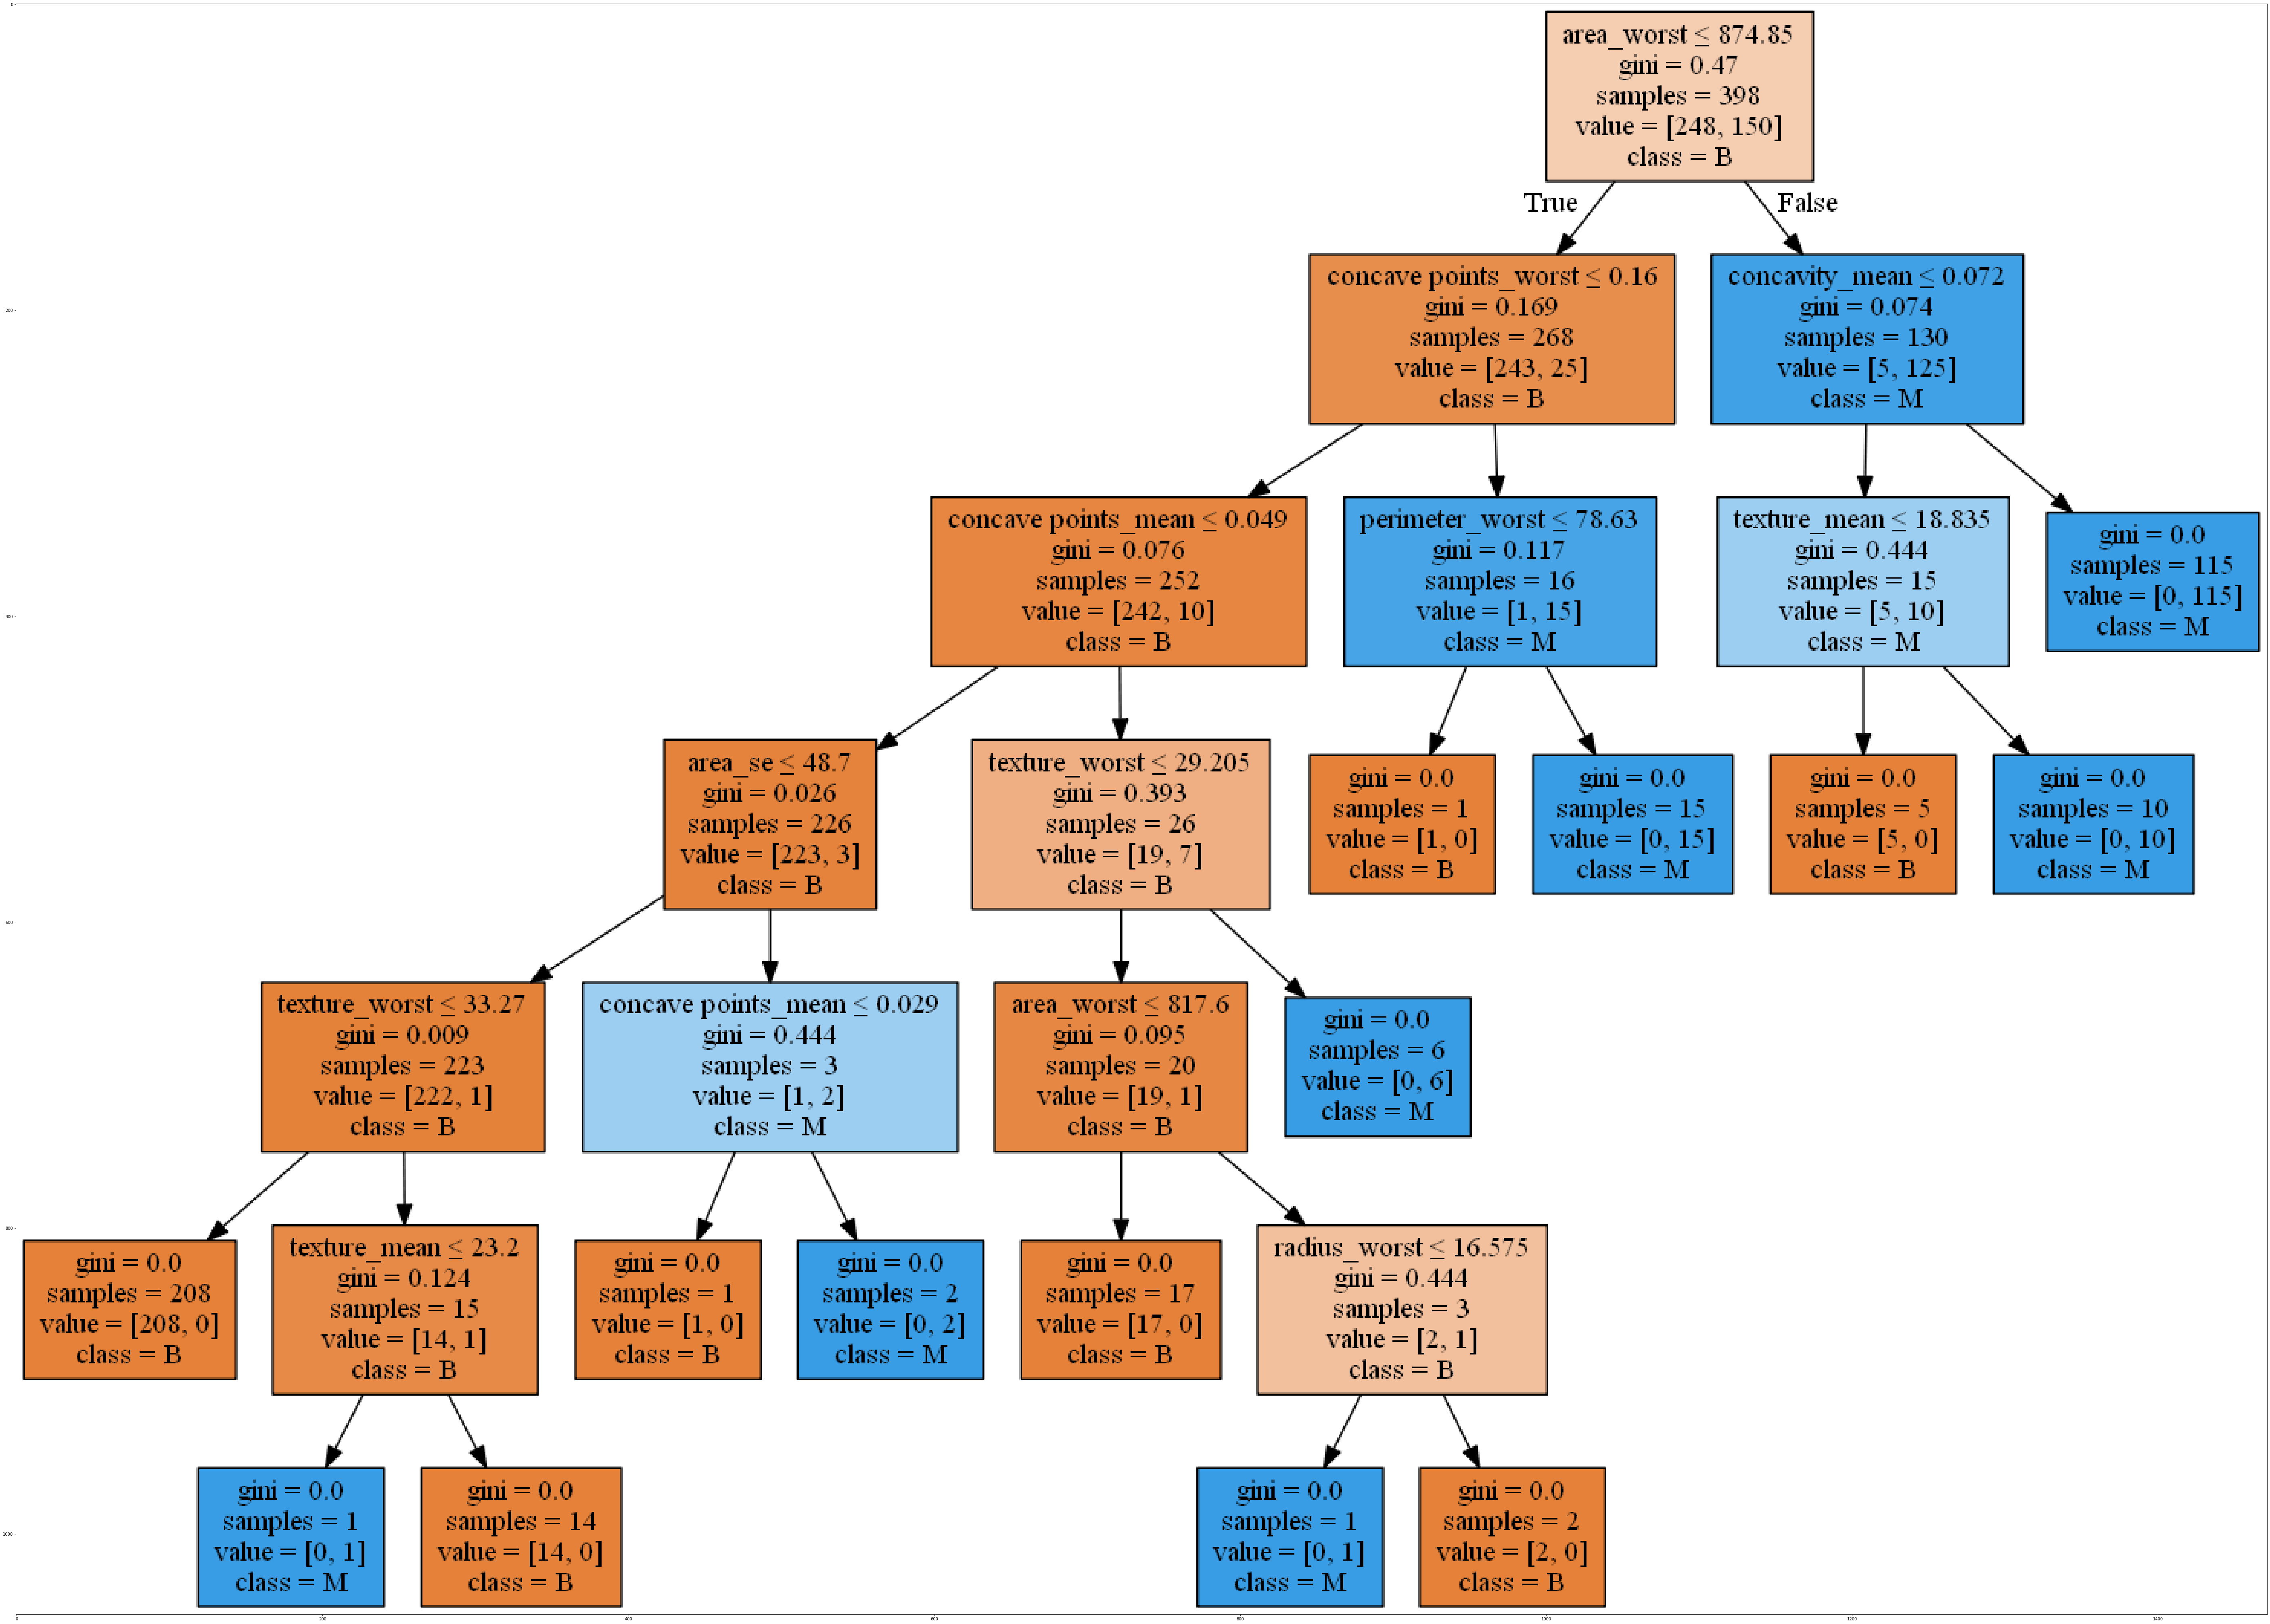

In [11]:
draw_tree(df, decision_tree_g, "decision-tree-gini.png", numAtributos, y_train)

### Overfitting

El sobreajuste es uno de los desafíos más importantes en el proceso de modelación de árboles de decisión. Si no se definen límites, el árbol tendrá un total de precisión en el conjunto de datos de entrenamiento. En el peor caso tendrá una hoja por cada observación.


* max_leaf_nodes
* min_samples_leaf
* máxima profundidad

Descripción
* max_leaf_nodes: este parámetro se puede utilizar para definir el número máximo de nodos hoja
* min_samples_leaf: este parámetro se puede usar para restringir el tamaño de la hoja de muestra
* max_depth: se puede usar para reducir la profundidad del árbol para construir un árbol generalizado

### Prepruning

* Dar un mínimo número de muestras u observaciones que se requieren en un nodo para ser considerado para ramificación.
* Valores demasiado altos pueden causar un pobre ajuste del modelo. El parámetro debe ajustarse usando validación cruzada.
* Dar un mínimo número de observaciones para un nodo terminal
* Valores más bajos son necesarios para problemas de clases no balanceadas.

DecisionTreeClassifier tiene ciertos parametros que se pueden incluir par evitar el overfitting en el árbol.

* max_leaf_nodes
* min_samples_leaf
* máxima profundidad

Descripción
* max_leaf_nodes: este parámetro se puede utilizar para definir el número máximo de nodos hoja
* min_samples_leaf: este parámetro se puede usar para restringir el tamaño de la hoja de muestra
* max_depth: se puede usar para reducir la profundidad del árbol para construir un árbol generalizado

### prepruning
Definir restricciones sobre el tamaño del árbol

In [12]:
parametros = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[4,5,7,8, 11], 
              'max_depth':[i for i in range(numAtributos)],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }

In [13]:
tr = tree.DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parametros)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort=True, random_state=None, splitter='best')

In [14]:
# prediccion del modelo
predTree_g = model.predict(X_test)

print("Evaluación")
print("La precisión del modleo usando Gini: ", metrics.accuracy_score(y_test, predTree_g))
print("Profundidad del árbol: ", model.tree_.max_depth)

Evaluación
La precisión del modleo usando Gini:  0.9415204678362573
Profundidad del árbol:  3


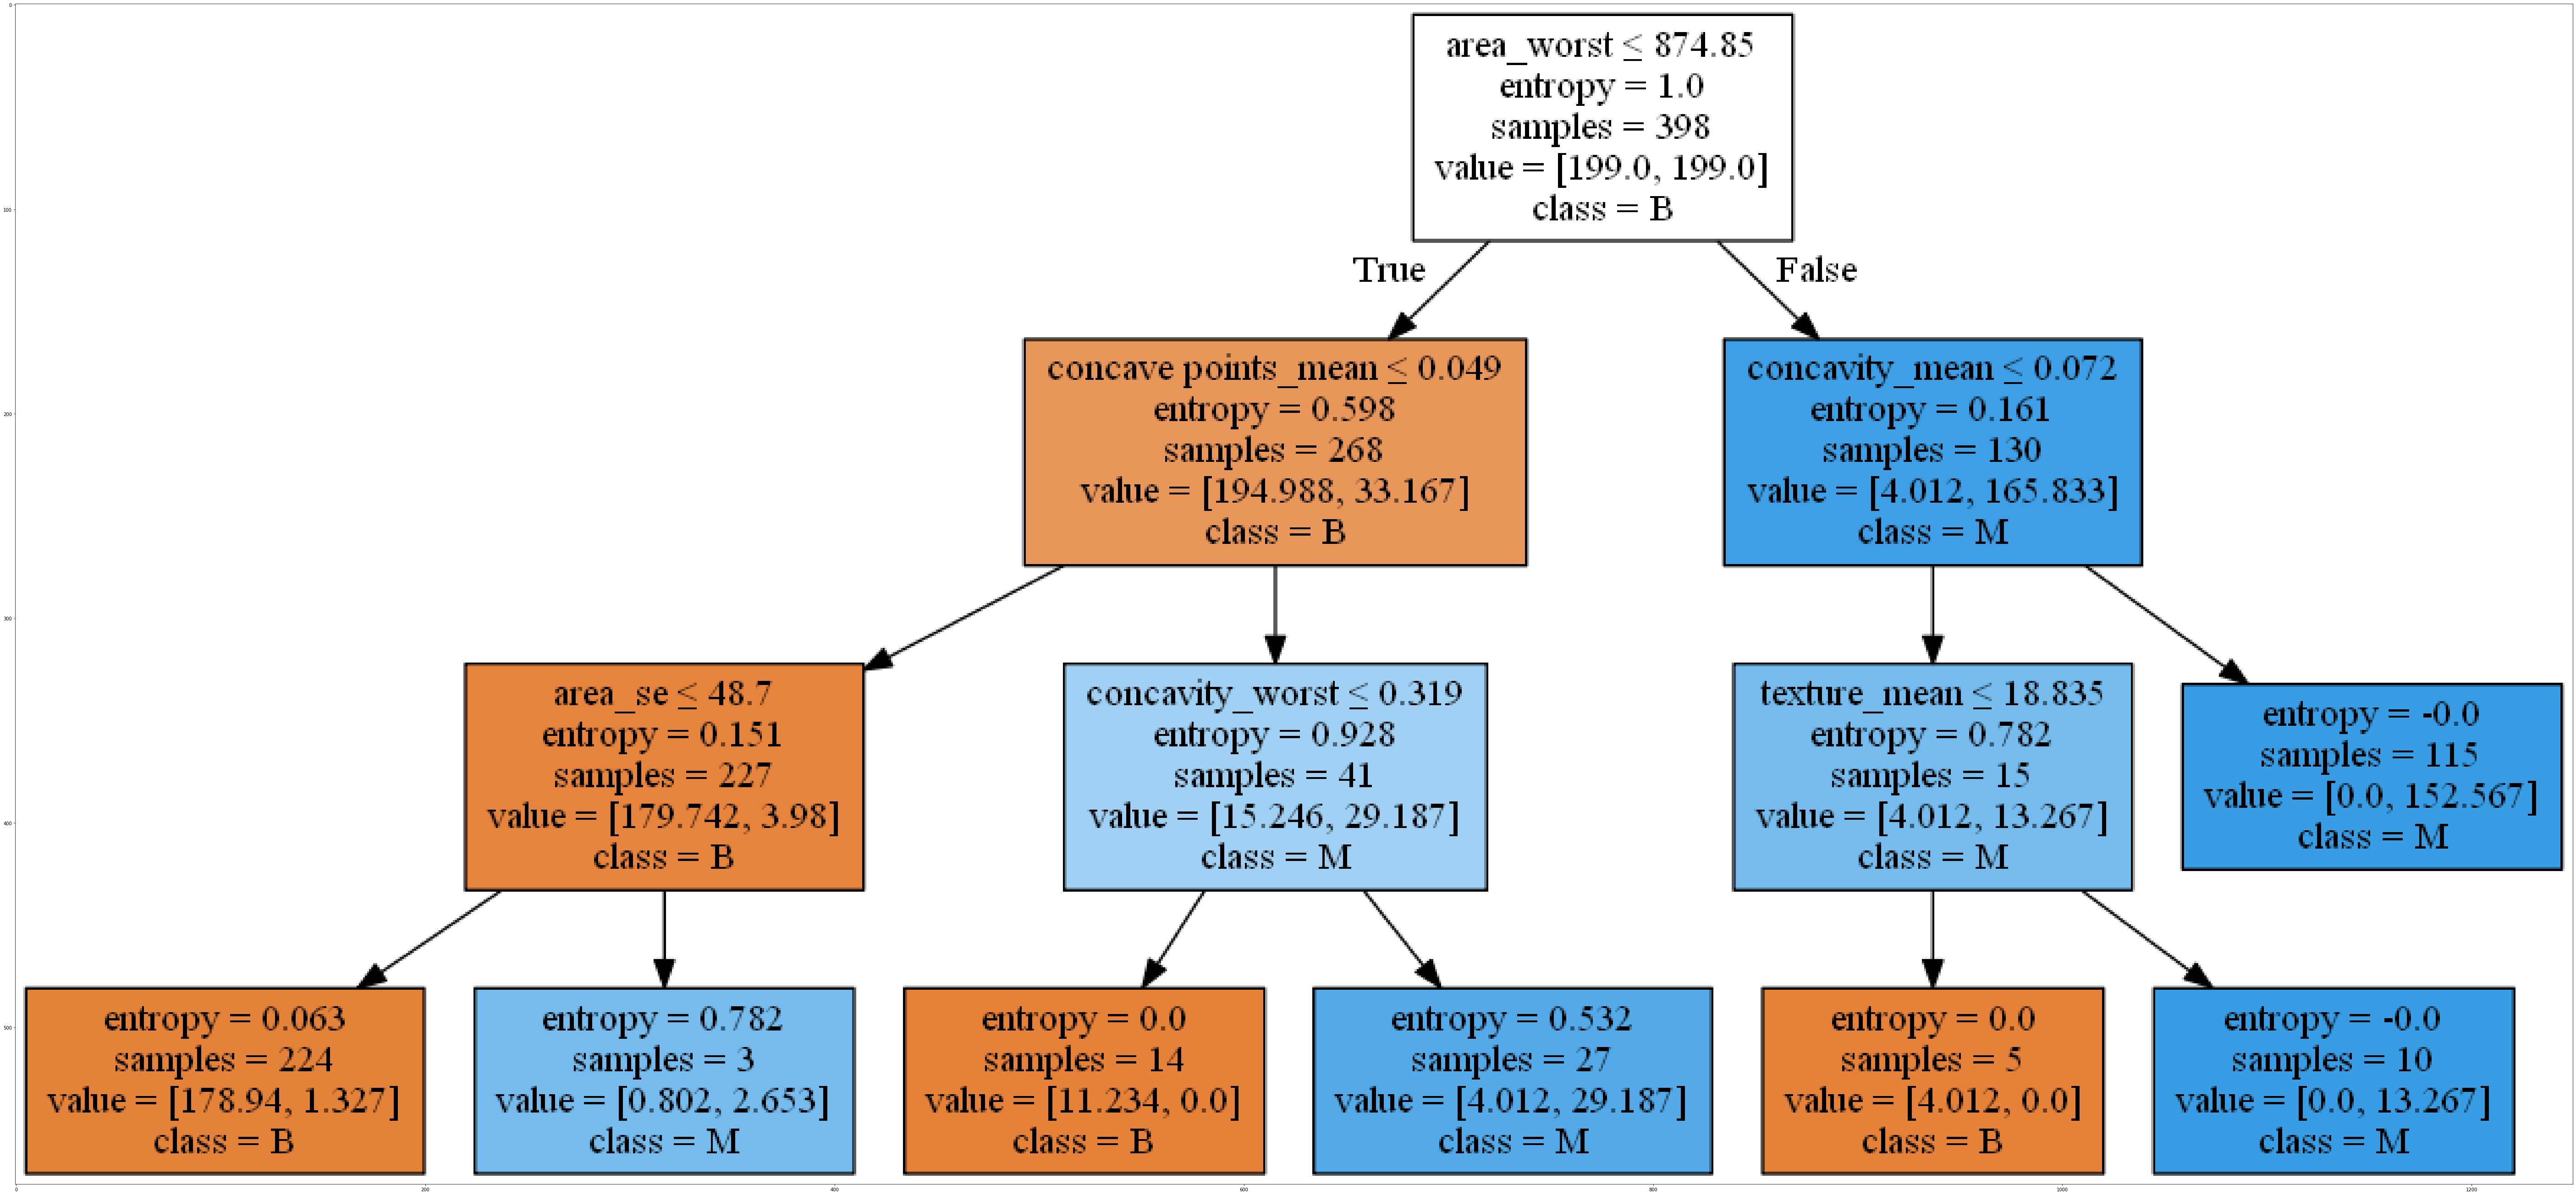

In [15]:
draw_tree(df, model, "decision-tree-best.png", 32, y_train)

### Post-pruning


La poda posterior también se conoce como poda hacia atrás. En esto, primero Genere el árbol de decisión y luego elimine las ramas no significativas. Después de la poda de un árbol de decisión implica que comenzamos generando el árbol (completo) y luego lo ajustamos con el objetivo de mejorar la precisión de la clasificación en instancias invisibles.

DecisionTreeClassifier proporciona parámetros  para evitar que un árbol se sobreajuste. 
Cost complexity pruning proporciona otra opción para controlar el tamaño de un árbol. En DecisionTreeClassifier, esta técnica de poda se parametriza por el parámetro cc_alpha de complejidad de costes. Los valores más grandes de aumentar el número de nodos podados. Se eligira el parametros basado en las puntuaciones de validación. min_samples_leaf, max_depth, ccp_alpha.

La poda de costo-complejidad mínima es un algoritmo utilizado para podar un árbol para evitar el sobreajuste. Este algoritmo está parametrizado por $ $ conocido como el parámetro de complejidad. El parámetro de complejidad se utiliza para definir la medida de costo-complejidad, de un árbol dado.

In [16]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

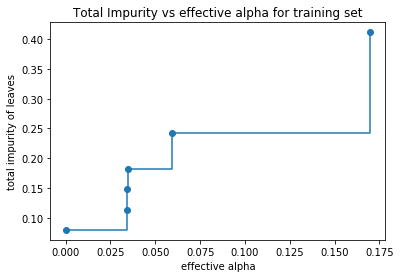

In [17]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [18]:
"""
    Se van acrear árboles con las alphas que se obtiveron del modelo anterior
"""
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    print("Numero de nodos el árbol con cc_alpha {} es {}, con profundidad {}".format(
      ccp_alpha, clf.tree_.node_count, clf.tree_.max_depth))

"""
    Realizar conteo de nodos para cada árbol creado,
        con su respectiva profundidad
"""
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

Numero de nodos el árbol con cc_alpha 0.0 es 27, con profundidad 6
Numero de nodos el árbol con cc_alpha 0.03394206959717761 es 5, con profundidad 2
Numero de nodos el árbol con cc_alpha 0.03435540453337718 es 5, con profundidad 2
Numero de nodos el árbol con cc_alpha 0.0349010931377966 es 5, con profundidad 2
Numero de nodos el árbol con cc_alpha 0.05921727905520242 es 5, con profundidad 2
Numero de nodos el árbol con cc_alpha 0.16974676908605058 es 3, con profundidad 1
Numero de nodos el árbol con cc_alpha 0.5882774509933888 es 1, con profundidad 0


In [19]:
"""
    Obtener los puntajes de entrenamieto y prueba
        para poder compararlos con los alpha obtenido
"""
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

[0.         0.03394207 0.0343554  0.03490109 0.05921728 0.16974677
 0.58827745]


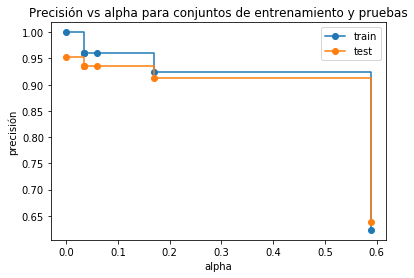

In [20]:
print(ccp_alphas)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precisión")
ax.set_title("Precisión vs alpha para conjuntos de entrenamiento y pruebas")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

A medida que aumenta el alpha, se poda más del árbol, creando así un árbol de decisión que generaliza mejor. En este caso, la configuración maximiza la precisión de las pruebas ccp_alpha=0.16974677, que es el sexto árbol que se creo en la lista clfs.

In [29]:
criterion = 'entropy'
class_weight = 'balanced'
max_depth = 5
min_samples_split = 5
ccp_alpha = 0.03394207

treeFinal = tree.DecisionTreeClassifier(criterion=criterion, 
                                        max_depth=max_depth,
                                        min_samples_split=min_samples_split,
                                        class_weight=class_weight,
                                        ccp_alpha = ccp_alpha)
treeFinal.fit(X_train, y_train)
treeFinal

DecisionTreeClassifier(ccp_alpha=0.03394207, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [30]:
# prediccion del modelo
predTree_g = treeFinal.predict(X_test)

print("Evaluación")
print("La precisión del modleo usando Gini: ", model.score(X_train, y_train))
print("Profundidad del árbol: ", treeFinal.tree_.max_depth)

Evaluación
La precisión del modleo usando Gini:  0.9824120603015075
Profundidad del árbol:  3


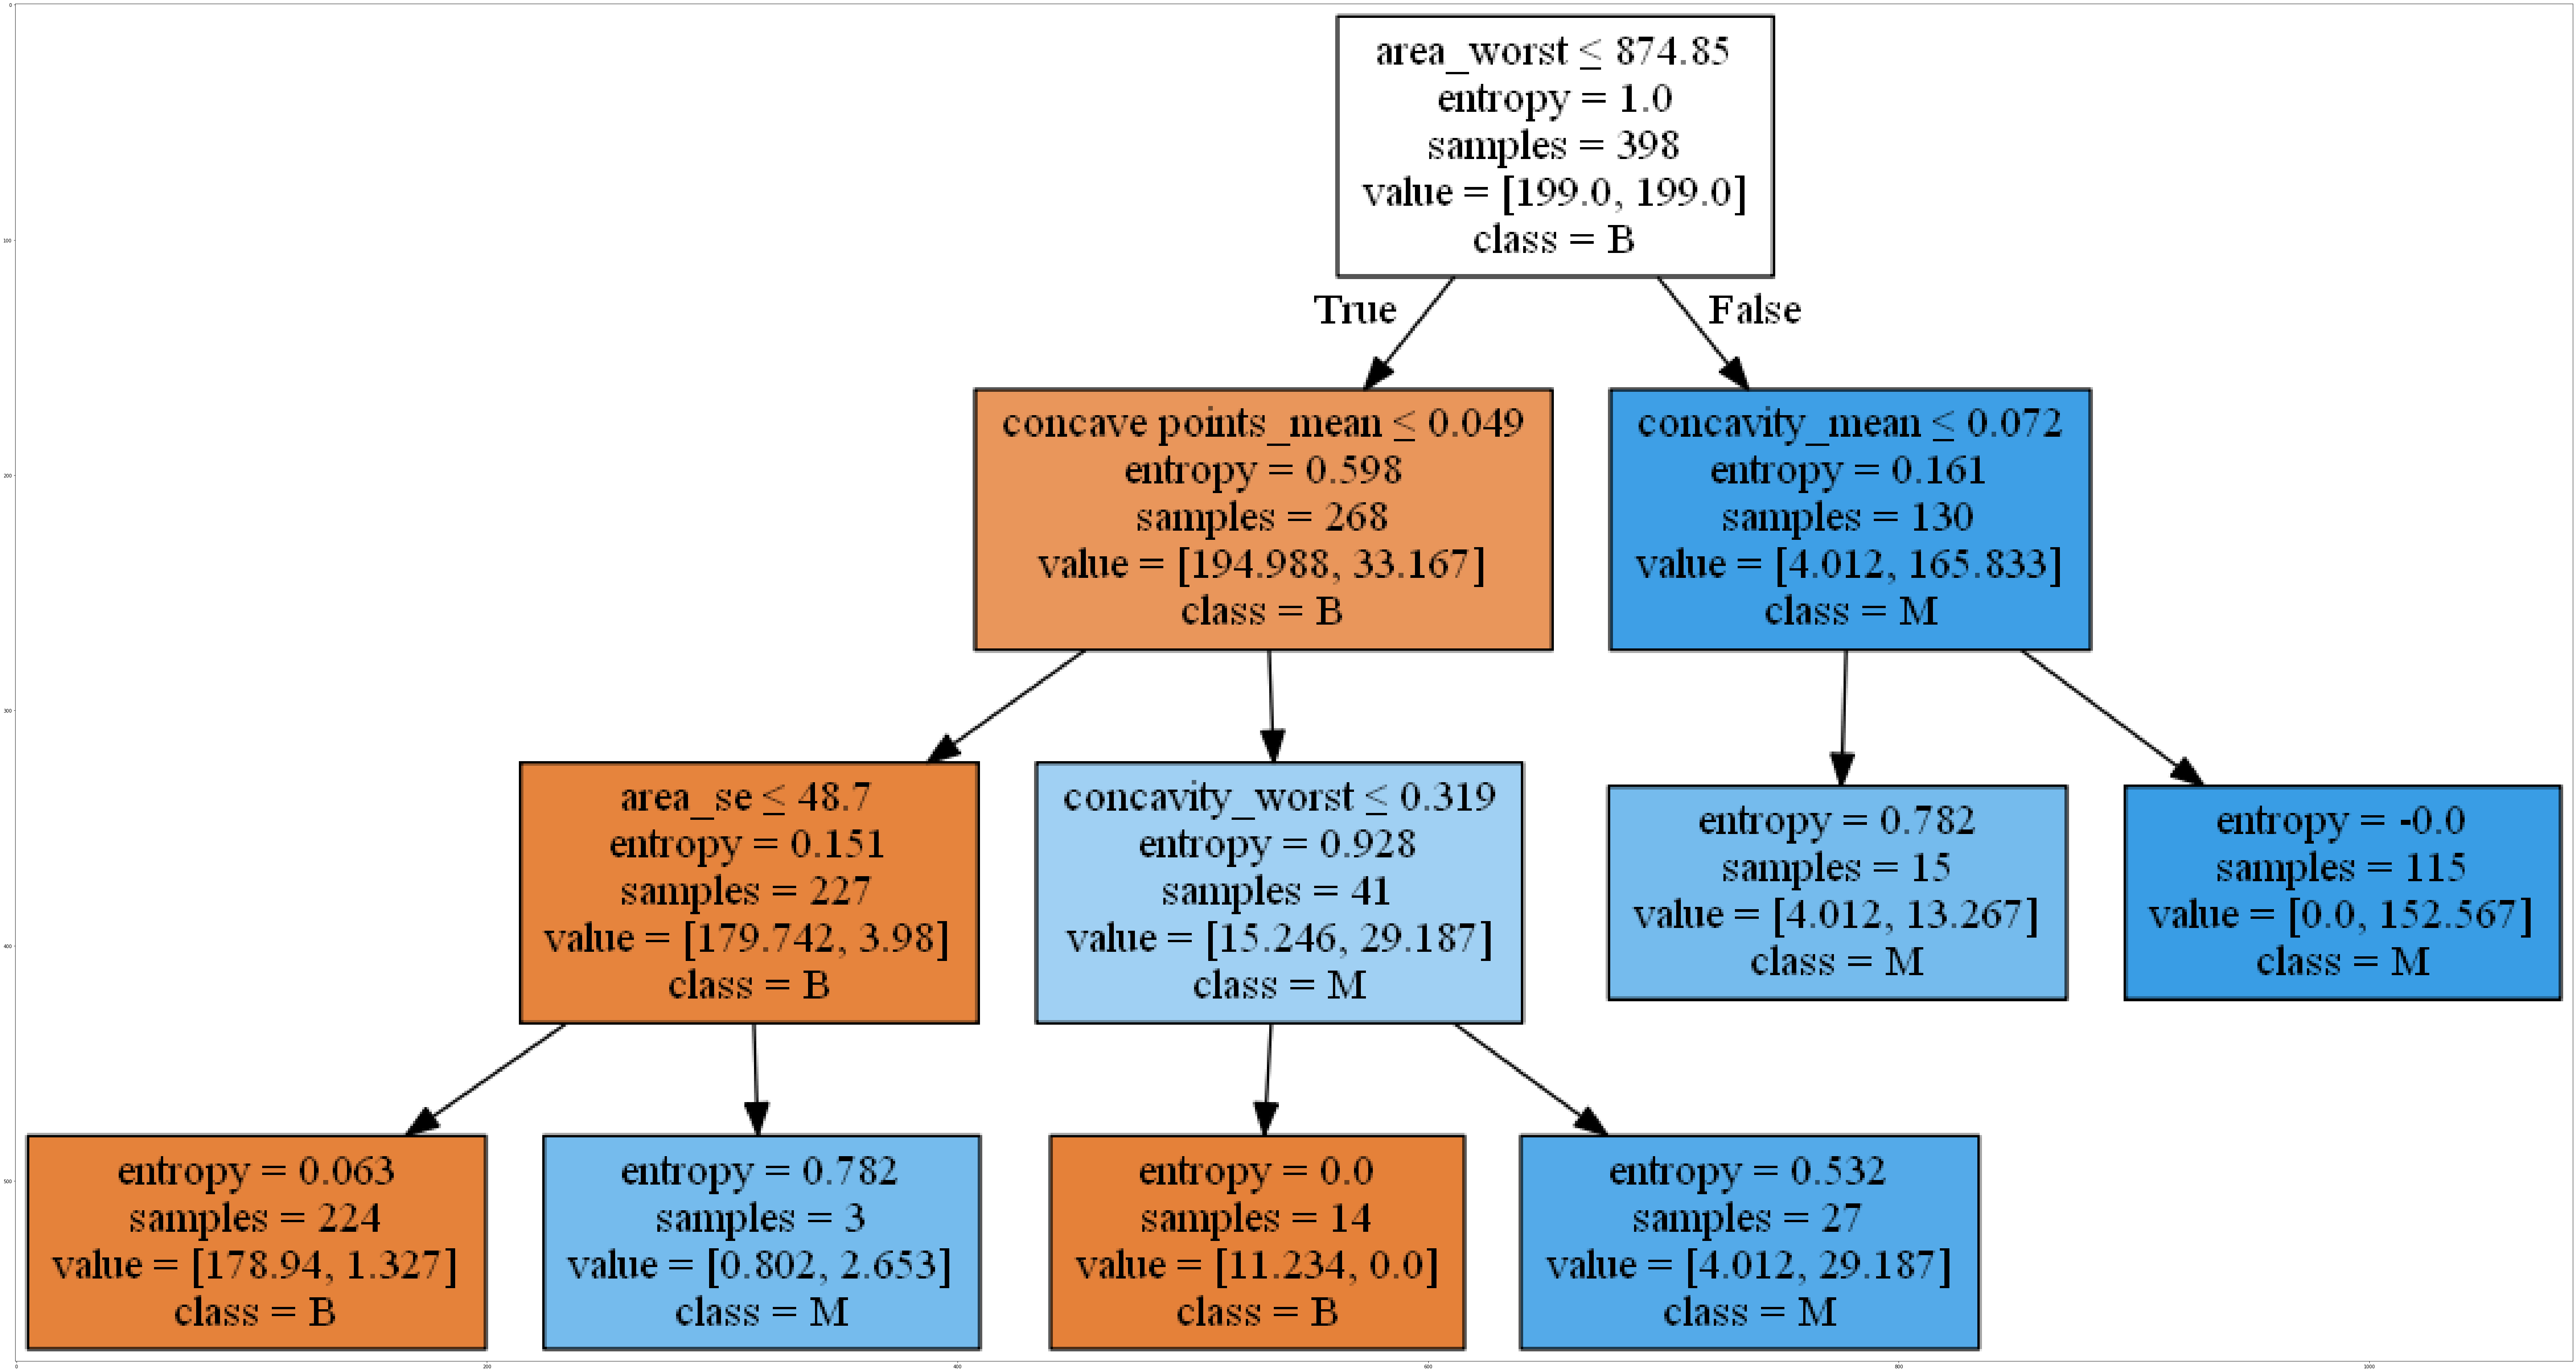

In [31]:
draw_tree(df, treeFinal, "decision-tree-prunig.png", 32, y_train)